<a href="https://colab.research.google.com/github/ashok8857/AssignmentSol/blob/main/yolo_weed_detaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
path='/content/drive/MyDrive/Colab Notebooks/CNN/yolo'
os.chdir(path)

In [3]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/CNN/yolo'

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15002, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 15002 (delta 1), reused 3 (delta 1), pack-reused 14995
Receiving objects: 100% (15002/15002), 14.09 MiB | 12.71 MiB/s, done.
Resolving deltas: 100% (10281/10281), done.


In [ ]:
!pip3 install virtualenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 42.2 MB/s eta 0:00:00


In [ ]:
!virtualenv env

created virtual environment CPython3.8.10.final.0-64 in 10947ms
  creator CPython3Posix(dest=/content/drive/MyDrive/Colab Notebooks/CNN/yolo/env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==22.3.1, setuptools==65.6.3, wheel==0.38.4
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [ ]:
!source env/bin/activate

In [ ]:
!dir

env  yolov5


In [ ]:
!cd yolov5


In [4]:
%cd  yolov5/

/content/drive/MyDrive/Colab Notebooks/CNN/yolo/yolov5


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.6 MB/s eta 0:00:00


In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

In [ ]:
%cd ..

/content/drive/MyDrive/Colab Notebooks/CNN/yolo


In [ ]:
od.download("https://www.kaggle.com/datasets/vinayakshanawad/weedcrop-image-dataset/download?datasetVersionNumber=1")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ashok8857
Your Kaggle Key: ··········


100%|██████████| 251M/251M [00:03<00:00, 73.8MB/s]


In [ ]:
import torch

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', 'yolov5m-seg.pt')  # load from PyTorch Hub (WARNING: inference not yet supported)

/usr/local/lib/python3.8/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-1-24 Python-3.8.10 torch-1.13.1+cu116 CPU



  0%|          | 0.00/42.4M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5m-seg summary: 301 layers, 21971597 parameters, 0 gradients, 70.8 GFLOPs
WARNING ⚠️ YOLOv5 SegmentationModel is not yet AutoShape compatible. You will not be able to run inference with this model.


In [9]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/CNN/yolo/yolov5'

In [18]:
!python train.py --img 416 --batch 16 --epochs 300 --data '../weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/data.yaml' --cfg ./models/yolov5m.yaml --weights '/content/drive/MyDrive/Colab Notebooks/CNN/yolo/yolov5m-seg.pt' --name yolov5m_results  --cache


train: weights=/content/drive/MyDrive/Colab Notebooks/CNN/yolo/yolov5m-seg.pt, cfg=./models/yolov5m.yaml, data=../weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5m_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
fatal: cannot change to '/content/drive/MyDrive/Colab': No such file or directory
YOLOv5 🚀 2023-1-24 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.93

In [20]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/CNN/yolo/yolov5'

In [21]:
%cd runs/train/yolov5m_results5/weights/

/content/drive/MyDrive/Colab Notebooks/CNN/yolo/yolov5/runs/train/yolov5m_results5/weights


In [26]:
%cd ..


/content/drive/MyDrive/Colab Notebooks/CNN/yolo/yolov5


In [39]:
!python detect.py --weights ../yolov5/runs/train/yolov5m_results5/weights/best.pt --img 416 --conf 0.5 --source ../weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/valid/images

detect: weights=['../yolov5/runs/train/yolov5m_results5/weights/best.pt'], source=../weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/content/drive/MyDrive/Colab': No such file or directory
YOLOv5 🚀 2023-1-24 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
image 1/235 /content/drive/MyDrive/Colab Notebooks/CNN/yolo/weedcrop-image-dataset/WeedCrop.v1i.yolov5pytorch/valid/images/12120_jpg.rf.e2bf8a5eb2db67d77be7d32085df22bb.jpg: 256x416 1 weed, 16.0ms
imag

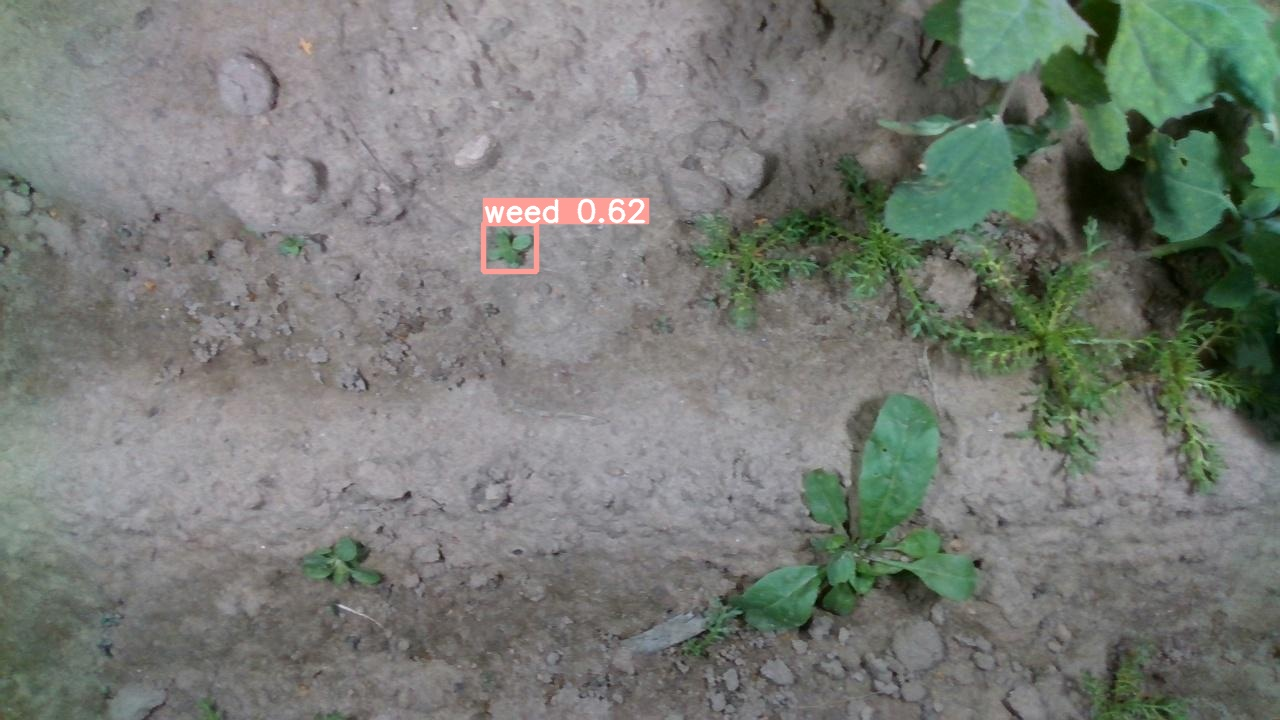

In [40]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/drive/MyDrive/Colab Notebooks/CNN/yolo/yolov5/runs/detect/exp8/12120_jpg.rf.e2bf8a5eb2db67d77be7d32085df22bb.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")